<img src="./assets/ga-logo.png" style="float: left; margin: 20px; height: 55px">

# Lab: Classification: Predicting Left-Handedness from Psychological Factors

---

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [25]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [26]:
df = pd.read_csv("data.csv", sep=r"\s+")
pd.set_option('display.max_columns', None)
df.head()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,1,1,5,5,5,1,5,1,5,1,5,1,1,1,5,5,5,1,5,1,1,1,1,5,5,1,1,1,5,5,5,1,5,1,91,232,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,2,5,3,4,1,4,1,1,1,5,2,4,4,4,1,2,1,2,1,3,1,5,2,4,4,4,4,4,1,3,1,4,4,5,17,247,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,4,5,4,3,4,1,2,3,1,3,3,3,4,5,3,2,2,2,1,4,3,3,4,4,2,2,4,2,1,4,2,2,2,2,11,6774,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,1,3,2,3,1,5,2,2,5,5,2,3,2,2,1,4,1,1,1,3,4,1,3,5,5,1,3,4,1,2,1,1,1,3,14,1072,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,1,1,5,5,5,1,5,1,5,2,5,1,5,1,5,5,5,1,5,1,5,1,5,5,5,1,1,1,5,5,5,1,5,1,10,226,US,2,1,22,3,1,1,3,2,3


---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [28]:
df['hand'].value_counts()/len(df)

hand
1    0.846558
2    0.108031
3    0.042782
0    0.002629
Name: count, dtype: float64

In [29]:
#remove 0
df = df[df['hand'] != 0]
df['hand'].value_counts()/len(df)

hand
1    0.848790
2    0.108315
3    0.042895
Name: count, dtype: float64

In [30]:
(df.corr(numeric_only=True).round(2)) 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
Q1,1.00,-0.12,0.28,-0.06,0.20,-0.08,0.17,-0.13,0.24,-0.06,0.11,-0.12,0.17,-0.07,0.24,-0.07,0.20,-0.05,0.16,-0.18,0.13,-0.10,0.09,-0.14,0.21,-0.06,0.20,-0.05,0.22,-0.07,0.16,-0.09,0.14,-0.07,0.26,-0.07,0.17,-0.06,0.29,-0.07,0.17,-0.06,0.21,-0.09,-0.02,-0.01,0.01,0.01,0.02,0.06,-0.16,-0.05,-0.03,-0.00,0.06
Q2,-0.12,1.00,-0.02,0.27,-0.05,0.16,-0.09,0.14,-0.10,0.15,-0.05,0.25,-0.21,0.28,0.06,0.27,-0.07,0.16,-0.10,0.34,-0.08,0.20,0.06,0.19,-0.19,0.22,-0.01,0.24,-0.04,0.22,-0.18,0.22,-0.21,0.24,-0.09,0.20,-0.07,0.24,-0.05,0.25,-0.11,0.23,-0.02,0.30,-0.00,0.01,0.01,-0.11,-0.06,-0.08,0.36,0.14,0.03,0.03,-0.01
Q3,0.28,-0.02,1.00,0.07,0.28,-0.01,0.22,-0.12,0.43,-0.03,0.15,-0.11,0.07,0.00,0.34,-0.07,0.34,-0.00,0.18,-0.15,0.16,-0.07,0.20,-0.08,0.25,-0.02,0.27,-0.00,0.36,-0.04,0.17,-0.07,0.14,-0.05,0.36,-0.01,0.24,-0.03,0.49,-0.04,0.22,0.00,0.27,-0.00,-0.02,-0.02,0.02,-0.04,-0.03,-0.02,-0.13,0.05,0.00,0.06,0.06
Q4,-0.06,0.27,0.07,1.00,0.06,0.08,-0.04,0.15,-0.07,0.06,-0.10,0.19,-0.21,0.24,0.02,0.26,-0.03,0.11,-0.11,0.24,-0.08,0.27,0.05,0.15,-0.06,0.25,0.02,0.22,0.03,0.18,-0.08,0.16,-0.12,0.27,0.04,0.24,-0.07,0.38,0.02,0.22,-0.02,0.33,0.01,0.34,-0.01,0.01,-0.00,-0.07,-0.02,-0.01,0.23,0.09,-0.02,0.05,0.04
Q5,0.20,-0.05,0.28,0.06,1.00,0.08,0.25,-0.05,0.23,0.01,0.06,-0.09,0.08,0.04,0.33,0.00,0.30,0.02,0.08,-0.06,0.10,0.01,0.13,-0.02,0.20,0.04,0.26,-0.01,0.21,-0.01,0.14,0.01,0.11,-0.01,0.24,-0.02,0.18,0.03,0.24,-0.01,0.21,0.02,0.26,0.01,-0.02,0.02,0.02,0.01,-0.08,-0.02,-0.06,0.04,-0.02,0.02,0.04
Q6,-0.08,0.16,-0.01,0.08,0.08,1.00,0.02,0.09,-0.03,0.20,0.05,-0.01,0.00,0.09,0.03,0.06,-0.04,0.20,-0.03,0.23,-0.00,0.10,0.12,0.10,-0.10,0.10,0.04,0.19,-0.02,0.09,-0.05,0.07,0.03,0.06,0.01,0.01,0.08,0.05,-0.01,-0.01,0.03,0.12,0.04,0.12,0.02,0.02,0.06,-0.01,-0.23,-0.17,0.13,0.10,0.01,-0.05,-0.03
Q7,0.17,-0.09,0.22,-0.04,0.25,0.02,1.00,-0.06,0.25,-0.02,0.06,-0.12,0.09,-0.07,0.22,-0.07,0.27,-0.01,0.13,-0.13,0.13,-0.04,0.15,-0.05,0.16,-0.07,0.19,-0.04,0.17,-0.08,0.17,-0.05,0.13,-0.06,0.22,-0.08,0.18,-0.07,0.20,-0.09,0.17,-0.05,0.19,-0.06,-0.00,-0.02,0.04,-0.01,-0.04,0.02,-0.12,0.02,-0.02,-0.02,0.04
Q8,-0.13,0.14,-0.12,0.15,-0.05,0.09,-0.06,1.00,-0.09,0.04,-0.11,0.23,-0.06,0.18,-0.12,0.21,-0.09,0.04,-0.16,0.20,-0.69,0.21,0.02,0.11,-0.09,0.17,-0.12,0.11,-0.13,0.19,-0.16,0.07,-0.18,0.15,-0.12,0.21,-0.11,0.24,-0.14,0.18,-0.10,0.16,-0.12,0.17,0.00,-0.01,-0.01,-0.01,-0.05,-0.05,0.15,-0.01,-0.01,0.03,-0.02
Q9,0.24,-0.10,0.43,-0.07,0.23,-0.03,0.25,-0.09,1.00,0.01,0.13,-0.13,0.11,-0.07,0.34,-0.14,0.42,-0.03,0.25,-0.15,0.11,-0.12,0.18,-0.13,0.23,-0.09,0.26,-0.08,0.26,-0.04,0.11,-0.20,0.12,-0.14,0.26,-0.06,0.26,-0.12,0.36,-0.11,0.19,-0.07,0.26,-0.08,0.01,-0.02,0.09,0.01,-0.08,-0.06,-0.12,-0.03,-0.05,0.02,0.03
Q10,-0.06,0.15,-0.03,0.06,0.01,0.20,-0.02,0.04,0.01,1.00,0.08,0.06,-0.05,0.07,0.03,0.08,-0.03,0.16,0.03,0.19,0.02,0.08,0.08,0.11,-0.09,0.07,0.03,0.20,-0.01,0.11,-0.07,0.06,-0.04,0.04,-0.02,0.04,0.09,0.05,-0.02,0.05,-0.03,0.13,0.03,0.10,0.01,0.02,0.06,0.01,-0.14,-0.11,0.14,0.07,-0.06,-0.01,-0.03


### Short answer questions:

In this lab you'll use K-nearest neighbors and logistic regression to model handedness based off of psychological factors. Answer the following related questions; your answers may be in bullet points.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

### 7. Give an example of when we might not standardize our variables.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your explanatory variables should be all Q columns. 
- (Optional : You may use stratify = 'y')

I'll first create my `X` and `y` dataframes:

In [31]:
X = df.drop(columns=['country','hand','introelapse','testelapse','fromgoogle','engnat','age','education','gender','orientation','race','religion'])
y = df['hand']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.25)

In [33]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best. 
 - try k=3,5,15, and 25

In [34]:
scores = []
ks = [3,5,15,25]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    acc_train = knn.score(X_train_sc, y_train)
    acc_test = knn.score(X_test_sc, y_test)
    scores.append((k, acc_train, acc_test))

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

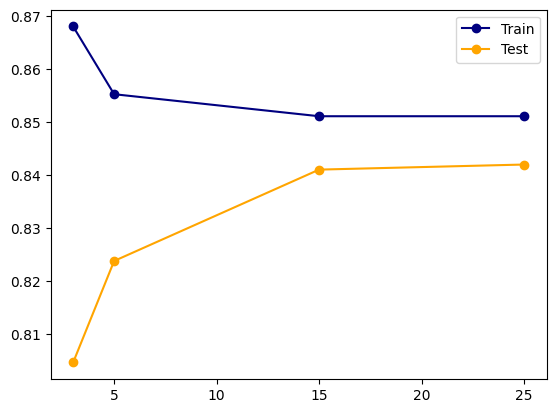

In [35]:
df_score = pd.DataFrame(scores, columns=['k', 'acc_train', 'acc_test'])
plt.plot(df_score.k, df_score.acc_train, 'o-', c='navy', label='Train')
plt.plot(df_score.k, df_score.acc_test, 'o-', c='orange', label='Test')
plt.legend();

###### Now I will add more columns to X

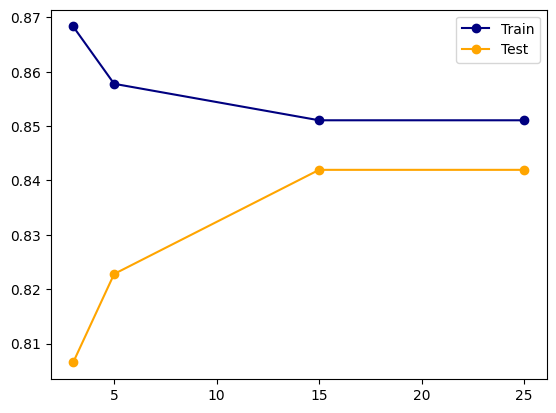

In [36]:
X1 = df.drop(columns=['hand','introelapse','testelapse','fromgoogle','engnat','education','race','religion'])
y1 = df['hand']

X1 = pd.get_dummies(columns = ['country'], drop_first=True,data=X1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=99, test_size=0.25)
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

scores = []
ks = [3,5,15,25]

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    acc_train = knn.score(X_train_sc, y_train)
    acc_test = knn.score(X_test_sc, y_test)
    scores.append((k, acc_train, acc_test))
    
df_score = pd.DataFrame(scores, columns=['k', 'acc_train', 'acc_test'])
plt.plot(df_score.k, df_score.acc_train, 'o-', c='navy', label='Train')
plt.plot(df_score.k, df_score.acc_test, 'o-', c='orange', label='Test')
plt.legend();

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

- Best is 15 and 25
- Adding more columns no need no diffrent